In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # to normalize data

# import data into features
x = df[['age','fare']]
x.age.fillna(value= x['age'].mean(),inplace=True)
# scaled data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# perform clustering, based on age and fare our data will be converted into 5 clusters
model = KMeans(n_clusters=5)
model.fit(x_scaled)

# Assign the clusters labels to the data
df['clusters'] = model.labels_
df.head()

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_5296\3878580603.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clusters
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [35]:
df['clusters'].unique()

array([0, 1, 3, 4, 2])

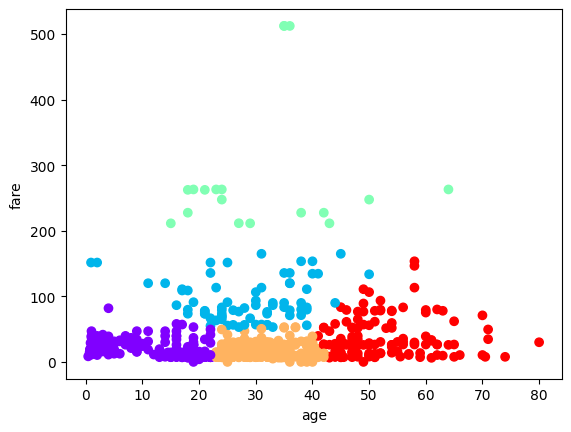

In [36]:
# ploting on based of clusters
plt.scatter(df['age'],df['fare'],c=df['clusters'], cmap='rainbow')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

In [37]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='clusters')
fig.show()

In [38]:
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='clusters')
fig.show()

In [39]:
fig = px.parallel_coordinates(df, color='clusters',title='Titanic Clusters')
fig.show()

In [46]:
#pip install joblib

In [47]:
# saving the model

joblib.dump(model,'K-MeansClustering.joblib')
# name 'joblib' is not defined , it means joblib is not imported
# name 'joblib' is not found , it means joblib is not installed

NameError: name 'joblib' is not defined

In [48]:
import joblib
joblib.dump(model,'K-MeansClustering.joblib')

['K-MeansClustering.joblib']

In [49]:
# load the saved model

model_loaded = joblib.load('K-MeansClustering.joblib')

In [70]:
import seaborn as sns

df1 = sns.load_dataset('tips')
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [71]:
df1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [82]:
x = df1.drop(columns=['sex'])
y = df1['sex']
x.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [73]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [75]:
from sklearn.preprocessing import LabelEncoder

# transforming categorical (smoker) into numerical
le = LabelEncoder()
le.fit(df1['smoker'])

df1['smoker'] = le.transform(df1['smoker'])


In [76]:

# transforming categorical (day) into numerical
le = LabelEncoder()
le.fit(df1['day'])

df1['day'] = le.transform(df1['day'])

In [77]:

# transforming categorical (time) into numerical
le = LabelEncoder()
le.fit(df1['time'])

df1['time'] = le.transform(df1['time'])

In [78]:
df1['smoker'].unique()

array([0, 1])

In [79]:
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [83]:
from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier().fit(x,y) ,  this should work same as below
model = DecisionTreeClassifier()
model = model.fit(x,y)

In [84]:
joblib.dump(model, 'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [85]:
model1 = joblib.load('tipswalamodel.joblib')

In [ ]:
import pickle
# saving model using pickle library ,  wb= write binaries : rb = read binaries
with open("model.pkl",'wb') as f:
    pickle.dump(model.f)
# loading model
with open("model.pkl",'rb') as f:
    loaded_model = pickle.load(f)
# joblib is more easier
